In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([i * np.pi/180 for i in range(0,720,6)])
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y, 'x2': x**2, 'x3': x**3})
df

,x,y,x2,x3
0,0.000000,0.000000,0.000000,0.000000
1,0.104720,0.104528,0.010966,0.001148
2,0.209440,0.207912,0.043865,0.009187
3,0.314159,0.309017,0.098696,0.031006
4,0.418879,0.406737,0.175460,0.073496
...,...,...,...,...
115,12.042772,-0.500000,145.028354,1746.543372
116,12.147492,-0.406737,147.561552,1792.502713
117,12.252211,-0.309017,150.116683,1839.261326
118,12.356931,-0.207912,152.693746,1886.826103


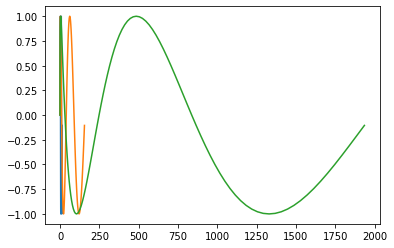

In [3]:
plt.plot(df['x'], df['y'])
plt.plot(df['x2'], df['y'])
plt.plot(df['x3'], df['y'])

In [4]:
from sklearn.linear_model import LinearRegression
model0 = LinearRegression()
model0.fit(df[['x','x2','x3']], df['y'])
df['y PL'] = model0.predict(df[['x','x2','x3']])
df

,x,y,x2,x3,y PL
0,0.000000,0.000000,0.000000,0.000000,1.110946
1,0.104720,0.104528,0.010966,0.001148,1.037695
2,0.209440,0.207912,0.043865,0.009187,0.967236
3,0.314159,0.309017,0.098696,0.031006,0.899521
4,0.418879,0.406737,0.175460,0.073496,0.834502
...,...,...,...,...,...
115,12.042772,-0.500000,145.028354,1746.543372,-0.865658
116,12.147492,-0.406737,147.561552,1792.502713,-0.932533
117,12.252211,-0.309017,150.116683,1839.261326,-1.002137
118,12.356931,-0.207912,152.693746,1886.826103,-1.074518


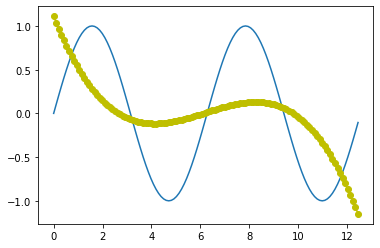

In [5]:
plt.plot(df['x'], df['y'])
plt.plot(df['x'], df['y PL'], 'yo-')

<hr>
### Adding more x^i

In [6]:
x = np.array([i * np.pi/180 for i in range(0,720,6)])
y = np.sin(x)
dfN = pd.DataFrame({'x': x, 'y': y})
for i in range(2,11):
    dfN[f'x{i}'] = df['x']**i

dfN

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.104720,0.104528,0.010966,0.001148,0.000120,0.000013,1.318778e-06,1.381021e-07,1.446202e-08,1.514459e-09,1.585938e-10
2,0.209440,0.207912,0.043865,0.009187,0.001924,0.000403,8.440179e-05,1.767707e-05,3.702277e-06,7.754031e-07,1.624000e-07
3,0.314159,0.309017,0.098696,0.031006,0.009741,0.003060,9.613892e-04,3.020293e-04,9.488531e-05,2.980910e-05,9.364805e-06
4,0.418879,0.406737,0.175460,0.073496,0.030786,0.012896,5.401715e-03,2.262665e-03,9.477829e-04,3.970064e-04,1.662976e-04
...,...,...,...,...,...,...,...,...,...,...,...
115,12.042772,-0.500000,145.028354,1746.543372,21033.223336,253298.309675,3.050414e+06,3.673544e+07,4.423965e+08,5.327680e+09,6.416003e+10
116,12.147492,-0.406737,147.561552,1792.502713,21774.411636,264504.482305,3.213066e+06,3.903069e+07,4.741250e+08,5.759429e+09,6.996262e+10
117,12.252211,-0.309017,150.116683,1839.261326,22535.018497,276103.809380,3.382882e+06,4.144779e+07,5.078271e+08,6.222004e+09,7.623331e+10
118,12.356931,-0.207912,152.693746,1886.826103,23315.380163,288106.546338,3.560113e+06,4.399207e+07,5.436070e+08,6.717314e+09,8.300538e+10


In [7]:
model1 = LinearRegression()
xn = ['x']
xn.extend(['x%d' %i for i in range(2,11)])
model1.fit(dfN[xn], dfN['y'])
df['y 10 PL'] = model1.predict(dfN[xn])
df

,x,y,x2,x3,y PL,y 10 PL
0,0.000000,0.000000,0.000000,0.000000,1.110946,-0.010209
1,0.104720,0.104528,0.010966,0.001148,1.037695,0.105359
2,0.209440,0.207912,0.043865,0.009187,0.967236,0.213912
3,0.314159,0.309017,0.098696,0.031006,0.899521,0.316323
4,0.418879,0.406737,0.175460,0.073496,0.834502,0.413004
...,...,...,...,...,...,...
115,12.042772,-0.500000,145.028354,1746.543372,-0.865658,-0.506408
116,12.147492,-0.406737,147.561552,1792.502713,-0.932533,-0.414256
117,12.252211,-0.309017,150.116683,1839.261326,-1.002137,-0.315236
118,12.356931,-0.207912,152.693746,1886.826103,-1.074518,-0.208826


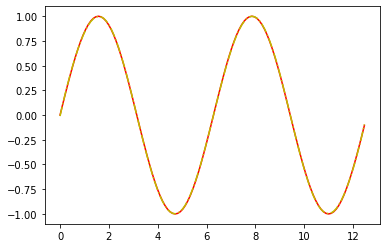

In [8]:
plt.plot(df['x'], df['y'], 'r-')
plt.plot(df['x'], df['y 10 PL'], 'y-.')

In [9]:
x2 = np.arange(1,11)
y2 = np.exp(x2)

data = ({'x':x2, 'y':y2})
df2 = pd.DataFrame(data)
df2

,x,y
0,1,2.718282
1,2,7.389056
2,3,20.085537
3,4,54.598150
4,5,148.413159
5,6,403.428793
6,7,1096.633158
7,8,2980.957987
8,9,8103.083928
9,10,22026.465795


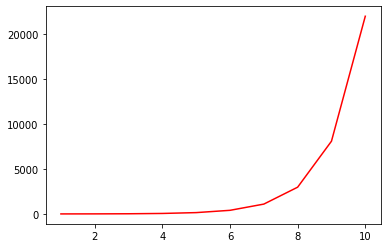

In [10]:
plt.plot(df2['x'], df2['y'], 'r-.')

In [14]:
for i in range(2,7):
    df2[f'x{i}'] = df['x']**i
df2

,x,y,x2,x3,x4,x5,x6
0,1,2.718282,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,7.389056,0.010966,0.001148,0.000120,0.000013,0.000001
2,3,20.085537,0.043865,0.009187,0.001924,0.000403,0.000084
3,4,54.598150,0.098696,0.031006,0.009741,0.003060,0.000961
4,5,148.413159,0.175460,0.073496,0.030786,0.012896,0.005402
5,6,403.428793,0.274156,0.143548,0.075161,0.039354,0.020606
6,7,1096.633158,0.394784,0.248050,0.155855,0.097926,0.061529
7,8,2980.957987,0.537345,0.393895,0.288740,0.211657,0.155153
8,9,8103.083928,0.701839,0.587971,0.492577,0.412661,0.345710
9,10,22026.465795,0.888264,0.837169,0.789014,0.743628,0.700853
